In [ ]:
#ANN with cow data

In [ ]:
#
import pandas as pd
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# load the dataset
dataset = loadtxt('CowData_ANN_1.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:11]
y = dataset[:,11]
dataset

array([[ 2.9387e+00,  2.9093e+00,  1.1457e+01, ...,  1.1000e-01,
         2.1290e+01,  0.0000e+00],
       [ 3.2224e+00,  2.8329e+00,  1.1508e+01, ...,  1.1000e-01,
        -7.9510e+01,  0.0000e+00],
       [ 2.4844e+00,  2.7936e+00,  1.0819e+01, ...,  9.0000e-02,
         9.6000e+00,  0.0000e+00],
       ...,
       [ 1.8799e+00,  3.1542e+00,  1.0947e+01, ...,  6.0000e-02,
         4.6578e+02,  0.0000e+00],
       [ 5.7736e+00,  2.7561e+00,  1.4212e+01, ...,  2.0000e-01,
         5.8195e+02,  0.0000e+00],
       [ 1.7968e+00,  2.8558e+00,  1.0455e+01, ...,  8.0000e-02,
         4.0098e+02,  0.0000e+00]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print  (X_train.shape)
print  (y_train.shape)

(1721, 11)
(1721,)


In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(22, input_dim=11, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(11, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model_history = model.fit(X_train, y_train, epochs=250, batch_size=20)

Epoch 1/250
87/87 [==============================] - 1s 2ms/step - loss: 0.8504 - accuracy: 0.4945
Epoch 2/250
87/87 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5857
Epoch 3/250
87/87 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5787
Epoch 4/250
87/87 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5904
Epoch 5/250
87/87 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.6014
Epoch 6/250
87/87 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5938
Epoch 7/250
87/87 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5880
Epoch 8/250
87/87 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5886
Epoch 9/250
87/87 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5892
Epoch 10/250
87/87 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5944
Epoch 11/

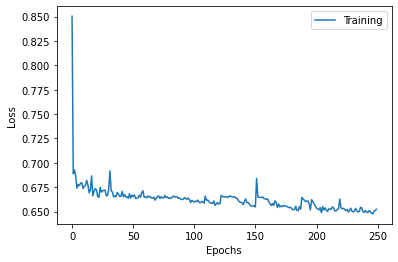

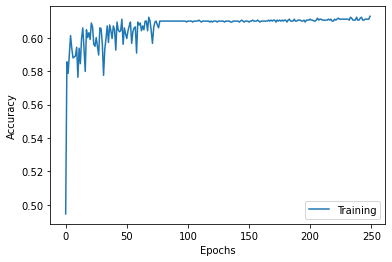

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.legend(['Training'])

    plt.figure() 
    plt.xlabel('Epochs') 
    plt.ylabel('Accuracy') 
    plt.plot(network_history.history['accuracy'])
    plt.legend(['Training'], loc='lower right') 
    plt.show()


plot_history(model_history)

In [ ]:
# evaluate the keras model
y_pred = model.predict(X_train)
y_classes = y_pred.argmax(axis=-1)
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

54/54 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.6119
Accuracy: 61.19


In [ ]:
# evaluate the keras model
y_pred = model.predict(X_test)
y_classes = y_pred.argmax(axis=-1)
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

14/14 [==============================] - 0s 6ms/step - loss: 0.6644 - accuracy: 0.5940
Accuracy: 59.40


In [ ]:
print(metrics.classification_report(y_test, y_classes))

              precision    recall  f1-score   support

         0.0       0.59      1.00      0.74       255
         1.0       0.00      0.00      0.00       176

    accuracy                           0.59       431
   macro avg       0.30      0.50      0.37       431
weighted avg       0.35      0.59      0.44       431



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0]) 
print('Test accuracy:', "{:.2%}".format(score[1]))

14/14 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.5940
Test loss: 0.6708570718765259
Test accuracy: 59.40%
